# Řešení kvízu ze šesté lekce

## Část 1

K této části kvízu budeš potřebovat data ze souboru [Salary_Data.csv](Salary_Data.csv), která obsahují informace o věku, délce praxe a platu různých osob. Délka praxe a věk jsou v letech a plat dolarech (ročně).

In [ ]:
import pandas as pd
import seaborn as sns
from scipy import stats
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt


data = pd.read_csv("Salary_Data.csv")

### Otázka 1

Než se podíváš na data, uvažuj celkem běžný předpoklad, že s délkou praxe výrazně roste plat člověka. Jakou hodnotu korelačního koeficientu bychom v takovém případě očekávali?

*Kladnou hodnotu blízkou 1*

### Otázka 2

Nyní zjisti hodnotu korelačního koeficientu mezi délkou praxe (sloupec YearsExperience) a platem (sloupec Salary). Hodnotu doplň do pole níže.

*0.978242*

### Otázka 3

Jakým příkazem vygeneruješ bodový graf (scatter plot) mezi délkou praxe a platem?

<Axes: xlabel='YearsExperience', ylabel='Salary'>

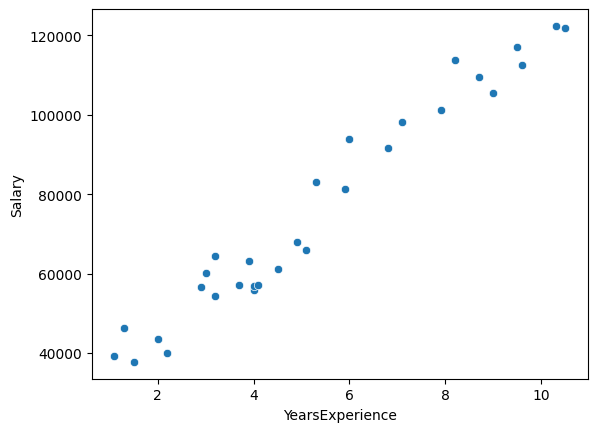

In [1]:
sns.scatterplot(data, x="YearsExperience", y="Salary")

### Otázka 4

Nyní uvažuj, že chceš vytvořit regresní model, který bude využívat délku praxe a plat člověka. Jak bys tyto proměnné označila?

*Délka praxe je vysvětlující proměnná a plat vysvětlovaná proměnná.*

### Otázka 5

Napiš příkaz, kterým vytvoříš regresní graf. Respektuj prosím, že vysvětlovaná proměnná by měla být na svislé ose a vysvětlující proměnná na vodorovné ose.

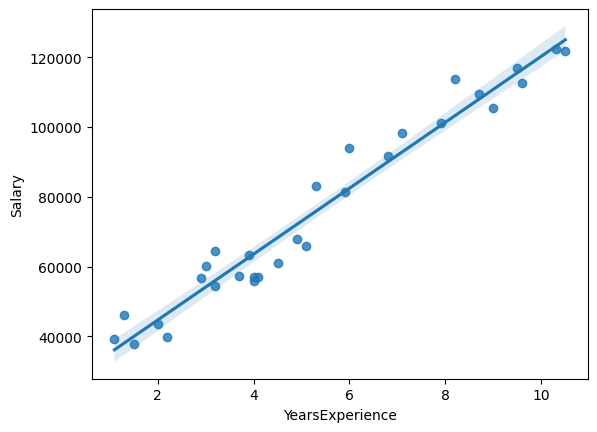

In [2]:
g = sns.regplot(data, x="YearsExperience", y="Salary")

### Otázka 6

Napiš příkazy, které:
1) vytvoří řetězec s regresní rovnicí (na lekci jsme používali řetězec formula),
2) vytvoří regresní model (na lekci jsme jej ukládali do proměnné mod),
3) vypočítá, jak by měla vypadat regresní funkce, plus další hodnoty jako koeficient determinace (na lekci jsme jej ukládali do proměnné res).

In [3]:
formula = "Salary ~ YearsExperience"
mod = smf.ols(formula=formula, data=data)
res = mod.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Sun, 19 Nov 2023   Prob (F-statistic):           1.14e-20
Time:                        12:43:51   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
YearsExperience  9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Otázka 7

Nech si zobrazit regresní tabulku s využitím metody summary. Které z následujících tvrzení je pravda?

In [4]:
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Sun, 19 Nov 2023   Prob (F-statistic):           1.14e-20
Time:                        12:45:07   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
YearsExperience  9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

*Za každý rok praxe navíc se zvýší průměrný plat člověka o 9449.9623 dolarů.*

### Otázka 8

Nech si zobrazit regresní tabulku s využitím metody summary. Jaký je koeficient determinace? A jak bys popsala, co nám jeho hodnota říká?

*0.957. Udává, kolik procent variability té naší vysvětlované proměnné (v našem případě ročního platu) dokážeme vysvětlit pomocí použitého modelu.*

### Otázka 9

Co můžeme říct o statistické významnosti regresních koeficientů? Uvažuj běžnou hladinu významnosti 5 %.

*Oba koeficienty jsou statisticky významné a měli bychom je v modelu nechat.*

### Otázka 10

Pokud bys získal(a) tabulku s délkou praxe několika lidí a tvým úkolem by bylo odhadnout jejich plat, jakou metodu bys využil(a)?

*predict()*

*Pozn. Odpověď "lineární regresi" jsem též uznával, otázka nebyla specifická a odpověď je tedy správná. Ale pokud již máte model vytvořený, stačí metoda .predit(), kterou jsme si uzakovali na lekci.*

## Část 2

### Otázka 11

Uvažuj, že jsi získal(a) tabulku se dvěma sloupci, jejichž bodový graf (scatter plot) vypadá jako graf na následujícím obrázku. Je v takovém případě vhodné použít lineární regresi?

![kviz/Capture4.PNG](kviz/Capture4.PNG)

*Lineární regrese není vhodná, protože přímka nepopisuje vztah mezi dvěma proměnnými. Bylo by nutné použít nějakou transformaci či jiný typ regrese*